<a href="https://colab.research.google.com/github/DodgerM1127/Data-Mining-class/blob/main/Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np

# Load the specified CSV file
file_name = 'DM_ project dataset_2026-01-12-2258.csv'
df = pd.read_csv(file_name)

print(f"Datoteka '{file_name}' je uspešno naložena.")
print("Prvih 5 vrstic podatkov:")
display(df.head())

Datoteka 'DM_ project dataset_2026-01-12-2258.csv' je uspešno naložena.
Prvih 5 vrstic podatkov:


,CUSTOMER_ID,AS_OF_TS,AS_OF_DATE,DEM_COUNTRY,DEM_COUNTRY_GROUP,DEM_CONTINENT,DEM_GENDER,DEM_MARITAL_STATUS,DEM_CHILDREN_COUNT_INT,DEM_HAS_CHILDREN_FLAG,...,TXN_AVG_ORDER_TOTAL,TIME_PCT_ORDERS_WEEKEND,PROD_N_DISTINCT_CATEGORIES,HEALTH_PCT_HEALTHY_QTY,MARGIN_SUM_EST_USD,FP_ORDER_HOUR,FP_IS_WEEKEND_FLAG,FP_ORDER_TOTAL,FP_N_ITEMS,FP_N_DISTINCT_ITEMS
0,1,2022-11-01 22:59:59.000,2022-11-01,Germany,Germany,Europe,Female,Single,0.0,0,...,39.168919,0.283784,4,0.160535,1637.60,18,0,31.50,3,3
1,2,2022-11-01 22:59:59.000,2022-11-01,Brazil,Brazil,South America,Male,Single,0.0,0,...,35.044118,0.352941,4,0.297297,1178.95,20,0,92.00,8,4
2,3,2022-11-01 22:59:59.000,2022-11-01,Poland,Poland,Europe,Female,Married,2.0,1,...,44.770161,0.241935,4,0.124542,1550.75,19,1,75.00,6,4
3,4,2022-11-01 22:59:59.000,2022-11-01,Poland,Poland,Europe,Female,Single,1.0,1,...,47.214286,0.269841,4,0.129870,1645.10,18,0,94.25,8,5
4,5,2022-11-01 22:59:59.000,2022-11-01,Spain,Spain,Europe,Female,Married,1.0,1,...,42.371094,0.265625,4,0.171004,1467.30,18,0,56.00,5,3


In [33]:
# Preverjanje manjkajočih vrednosti
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

if not missing_values.empty:
    print("Manjkajoče vrednosti v vsakem stolpcu:")
    display(missing_values)
else:
    print("V DataFrameu ni manjkajočih vrednosti.")

V DataFrameu ni manjkajočih vrednosti.


In [34]:
# Identifikacija outlierjev z uporabo IQR metode za numerične stolpce

numerical_cols = df.select_dtypes(include=np.number).columns
print("Preverjanje outlierjev v numeričnih stolpcih z metodo IQR:")

outlier_counts = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Preštej outlierje
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

    if len(outliers) > 0:
        print(f"  Stolpec '{col}': {len(outliers)} outlierjev. (IQR: [{lower_bound:.2f}, {upper_bound:.2f}])")
        # Lahko prikažemo tudi nekaj primerov outlierjev, če je potrebno
        # display(outliers[[col]].head())

if not any(outlier_counts.values()):
    print("  V izbranih numeričnih stolpcih ni zaznanih outlierjev z metodo IQR.")

Preverjanje outlierjev v numeričnih stolpcih z metodo IQR:
  Stolpec 'BEH_RECENCY_DAYS': 10949 outlierjev. (IQR: [-16.50, 35.50])
  Stolpec 'BEH_RELATIONSHIP_DAYS': 97 outlierjev. (IQR: [661.50, 1569.50])
  Stolpec 'BEH_N_ORDERS': 3129 outlierjev. (IQR: [32.00, 88.00])
  Stolpec 'BEH_N_ORDER_DAYS': 3129 outlierjev. (IQR: [32.00, 88.00])
  Stolpec 'TXN_SUM_ORDER_TOTAL': 3434 outlierjev. (IQR: [1072.62, 3797.62])
  Stolpec 'TXN_AVG_ORDER_TOTAL': 1916 outlierjev. (IQR: [28.64, 52.52])
  Stolpec 'TIME_PCT_ORDERS_WEEKEND': 2194 outlierjev. (IQR: [0.13, 0.44])
  Stolpec 'PROD_N_DISTINCT_CATEGORIES': 29687 outlierjev. (IQR: [4.00, 4.00])
  Stolpec 'HEALTH_PCT_HEALTHY_QTY': 1399 outlierjev. (IQR: [0.04, 0.32])
  Stolpec 'MARGIN_SUM_EST_USD': 3137 outlierjev. (IQR: [538.30, 2004.30])
  Stolpec 'FP_ORDER_TOTAL': 6296 outlierjev. (IQR: [-38.50, 109.50])
  Stolpec 'FP_N_ITEMS': 1690 outlierjev. (IQR: [-4.00, 12.00])
  Stolpec 'FP_N_DISTINCT_ITEMS': 136 outlierjev. (IQR: [-3.50, 8.50])


In [35]:
import numpy as np

# ============================================
# 1. LOG TRANSFORMACIJE (uspešne)
# ============================================
log_features = [
    'BEH_RECENCY_DAYS',      # ✓ Perfektno
    'TXN_SUM_ORDER_TOTAL',   # ✓ Perfektno
    'MARGIN_SUM_EST_USD',    # ✓ Perfektno
    'TXN_AVG_ORDER_TOTAL',   # ✓ Perfektno
    'BEH_N_ORDER_DAYS'       # 🔄 Zamenjava iz CAPPED
]

for col in log_features:
    df[f'{col}_LOG'] = np.log1p(df[col])

# ============================================
# 2. DISKRETNE - BINNING (namesto capping)
# ============================================
# BEH_N_ORDERS - ustvari kategorije
df['BEH_N_ORDERS_BINNED'] = pd.cut(
    df['BEH_N_ORDERS'],
    bins=[0, 20, 40, 60, 88, np.inf],
    labels=['Low', 'Medium', 'High', 'Very High', 'Extreme']
)
# ... ali uporabi log če želiš numerično
df['BEH_N_ORDERS_LOG'] = np.log1p(df['BEH_N_ORDERS'])

# FP_N_ITEMS - pusti original ali binning
df['FP_N_ITEMS_BINNED'] = pd.cut(
    df['FP_N_ITEMS'],
    bins=[0, 3, 6, 10, np.inf],
    labels=['Few', 'Medium', 'Many', 'Very Many']
)

# ============================================
# 3. ORIGINAL (brez transformacije)
# ============================================
original_features = [
    'FP_ORDER_TOTAL',             # 🔄 Vrni nazaj - original je boljši
    'TIME_PCT_ORDERS_WEEKEND',    # Že delež [0,1]
    'HEALTH_PCT_HEALTHY_QTY',     # Že delež [0,1]
    'PROD_N_DISTINCT_CATEGORIES', # Diskretna, že OK
    'BEH_RELATIONSHIP_DAYS'       # Dolgoročna metrika, OK
]

# ============================================
# 4. FINALNI FEATURE SET ZA CLUSTERING
# ============================================
clustering_features = [
    # RFM core (transformed)
    'BEH_RECENCY_DAYS_LOG',
    'BEH_N_ORDERS_LOG',  # ali _BINNED če one-hot encode
    'TXN_SUM_ORDER_TOTAL_LOG',
    'TXN_AVG_ORDER_TOTAL_LOG',

    # Vedenjski (original)
    'TIME_PCT_ORDERS_WEEKEND',
    'HEALTH_PCT_HEALTHY_QTY',
    'PROD_N_DISTINCT_CATEGORIES',

    # Dodatni (transformed)
    'MARGIN_SUM_EST_USD_LOG',
    'BEH_RELATIONSHIP_DAYS',  # Original
    'BEH_N_ORDER_DAYS_LOG',   # Zdaj LOG

    # First Purchase (original)
    'FP_ORDER_TOTAL',  # ORIGINAL - ne LOG!
    'FP_N_ITEMS'       # Original ali binned
]

# Standardizacija
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[clustering_features])

In [36]:
display(df.head())

,CUSTOMER_ID,AS_OF_TS,AS_OF_DATE,DEM_COUNTRY,DEM_COUNTRY_GROUP,DEM_CONTINENT,DEM_GENDER,DEM_MARITAL_STATUS,DEM_CHILDREN_COUNT_INT,DEM_HAS_CHILDREN_FLAG,...,FP_N_ITEMS,FP_N_DISTINCT_ITEMS,BEH_RECENCY_DAYS_LOG,TXN_SUM_ORDER_TOTAL_LOG,MARGIN_SUM_EST_USD_LOG,TXN_AVG_ORDER_TOTAL_LOG,BEH_N_ORDER_DAYS_LOG,BEH_N_ORDERS_BINNED,BEH_N_ORDERS_LOG,FP_N_ITEMS_BINNED
0,1,2022-11-01 22:59:59.000,2022-11-01,Germany,Germany,Europe,Female,Single,0.0,0,...,3,3,3.218876,7.972294,7.401597,3.693094,4.317488,Very High,4.317488,Few
1,2,2022-11-01 22:59:59.000,2022-11-01,Brazil,Brazil,South America,Male,Single,0.0,0,...,8,4,0.000000,7.776535,7.073227,3.584744,4.234107,Very High,4.234107,Many
2,3,2022-11-01 22:59:59.000,2022-11-01,Poland,Poland,Europe,Female,Married,2.0,1,...,6,4,3.178054,7.929036,7.347139,3.823632,4.143135,Very High,4.143135,Medium
3,4,2022-11-01 22:59:59.000,2022-11-01,Poland,Poland,Europe,Female,Single,1.0,1,...,8,5,2.079442,7.998167,7.406164,3.875655,4.158883,Very High,4.158883,Many
4,5,2022-11-01 22:59:59.000,2022-11-01,Spain,Spain,Europe,Female,Married,1.0,1,...,5,3,2.708050,7.905718,7.291861,3.769793,4.174387,Very High,4.174387,Medium


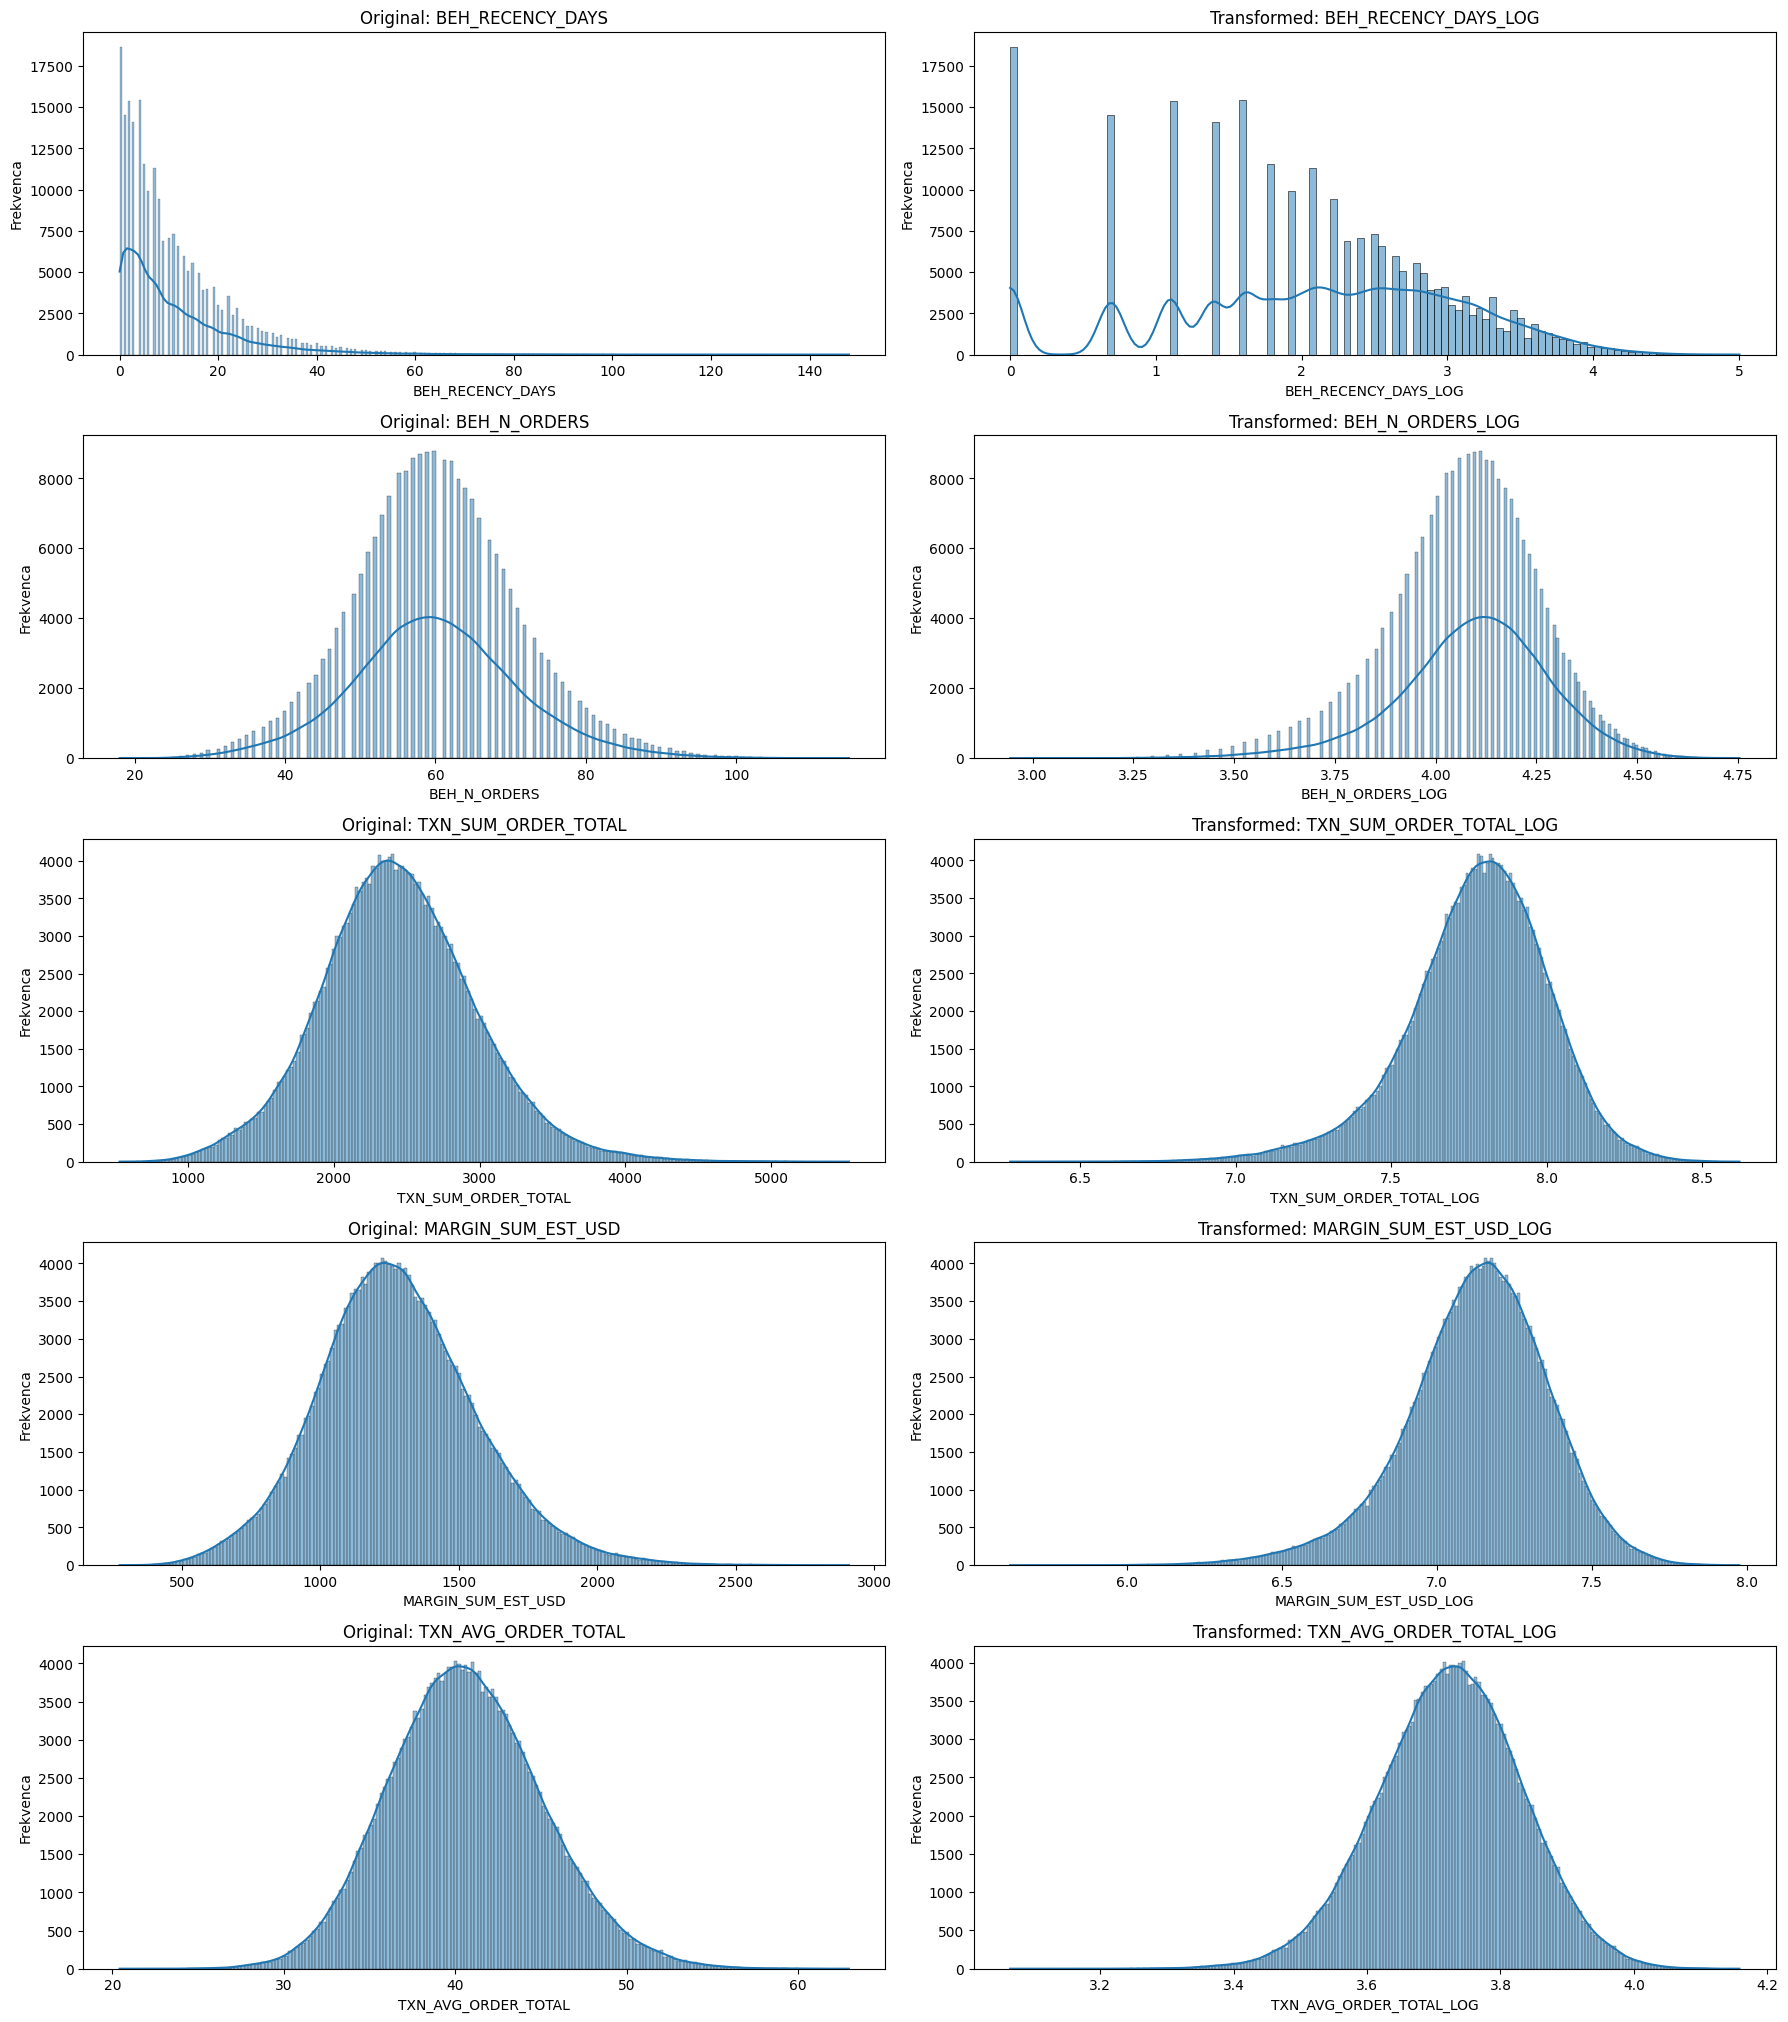

Vizualizacije distribucij pred in po transformaciji/cappingu so prikazane.


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the pairs of original and transformed/capped columns to visualize
visualization_pairs = [
    ('BEH_RECENCY_DAYS', 'BEH_RECENCY_DAYS_LOG'),
    ('BEH_N_ORDERS', 'BEH_N_ORDERS_LOG'),
    ('TXN_SUM_ORDER_TOTAL', 'TXN_SUM_ORDER_TOTAL_LOG'),
    ('MARGIN_SUM_EST_USD', 'MARGIN_SUM_EST_USD_LOG'),
    ('TXN_AVG_ORDER_TOTAL', 'TXN_AVG_ORDER_TOTAL_LOG'),
    ('FP_ORDER_TOTAL', 'FP_ORDER_TOTAL_LOG'),
    ('BEH_N_ORDER_DAYS', 'BEH_N_ORDER_DAYS_CAPPED'),
    ('FP_N_ITEMS', 'FP_N_ITEMS_CAPPED')
]

plt.figure(figsize=(18, 4 * len(visualization_pairs))) # Adjust figure size dynamically

plots_generated = 0
for i, (original_col, transformed_col) in enumerate(visualization_pairs):
    # Check if original_col exists
    if original_col not in df.columns:
        print(f"Warning: Original column '{original_col}' not found in DataFrame. Skipping visualization for this pair.")
        continue
    # Check if transformed_col exists
    if transformed_col not in df.columns:
        print(f"Warning: Transformed column '{transformed_col}' not found in DataFrame. Skipping visualization for this pair.")
        continue

    # Plot original distribution
    plt.subplot(len(visualization_pairs), 2, 2 * plots_generated + 1)
    sns.histplot(df[original_col], kde=True)
    plt.title(f'Original: {original_col}')
    plt.xlabel(original_col)
    plt.ylabel('Frekvenca')

    # Plot transformed/capped distribution
    plt.subplot(len(visualization_pairs), 2, 2 * plots_generated + 2)
    sns.histplot(df[transformed_col], kde=True)
    plt.title(f'Transformed: {transformed_col}')
    plt.xlabel(transformed_col)
    plt.ylabel('Frekvenca')
    plots_generated += 1

if plots_generated == 0:
    print("No visualizations could be generated as required columns were missing.")
else:
    plt.tight_layout()
    plt.show()

print("Vizualizacije distribucij pred in po transformaciji/cappingu so prikazane.")